In [12]:
import pandas as pd
import numpy as np
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style


df = pd.read_excel("datasets/covid19_rsa.xlsx")

In [13]:
df

,Date,Screened,Referred,People tested(antigen),EC,FS,GP,KZN,LP,MP,NW,NC,WC,unknown,Confirmed New Daily,Confirmed Total,Deaths New,Deaths Total,Recovered
0,03-04,NaN,NaN,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN
1,03-05,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,NaN,NaN
2,03-06,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN,NaN
3,03-07,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,NaN,NaN
4,03-08,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,07-05,NaN,NaN,1830161.0,35648.0,2553.0,63404.0,15146.0,1706.0,1965.0,6063,734.0,69531.0,0.0,8773.0,196750,173.0,3199.0,93315.0
124,07-06,NaN,NaN,1864111.0,38081.0,2804.0,66891.0,15819.0,1785.0,2173.0,6410,820.0,70938.0,0.0,8971.0,205721,111.0,3310.0,97848.0
125,07-07,NaN,NaN,1907532.0,40401.0,3034.0,71488.0,16743.0,1950.0,2353.0,6842,888.0,72156.0,0.0,10134.0,215855,192.0,3502.0,102299.0
126,07-08,NaN,NaN,1944399.0,42357.0,3259.0,75015.0,17962.0,2131.0,2528.0,7147,974.0,73292.0,0.0,8810.0,224665,100.0,3602.0,106842.0


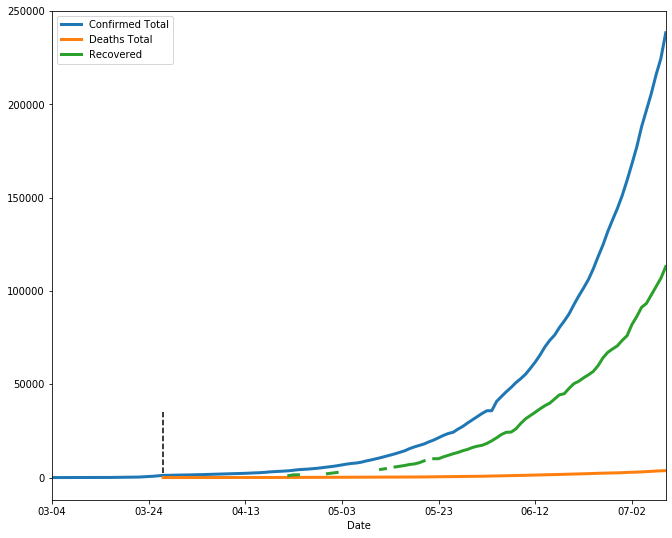

In [14]:
x_coordinates = []
y_coordinates = []
Confirmed_df = df.plot(x="Date", y=["Confirmed Total", "Deaths Total", "Recovered"], figsize = (11, 9), linewidth = 3, ) .vlines(x = 23, ymin = 2500, ymax=35000, linestyles='--')

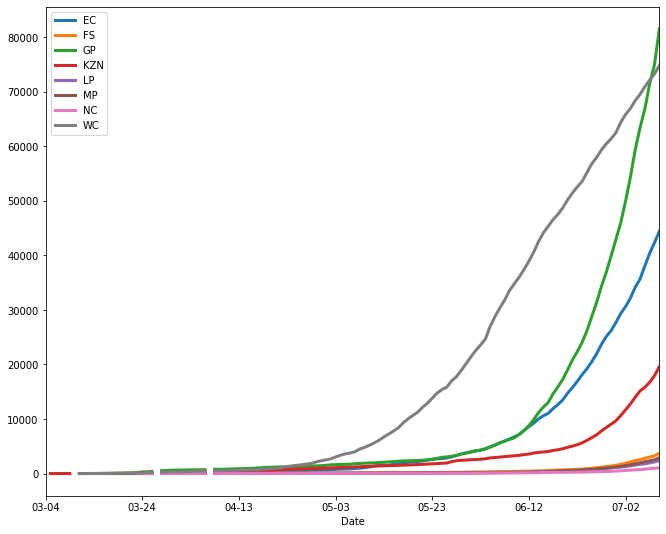

In [15]:
df["Confirmed Total"].fillna(0, inplace=True)
#df["Date"] = pd.to_datetime(df["Date"])
df.plot(x="Date", y=["EC", "FS", "GP", "KZN", "LP", "MP", "NW", "NC", "WC"], figsize = (11, 9), linewidth = 3)

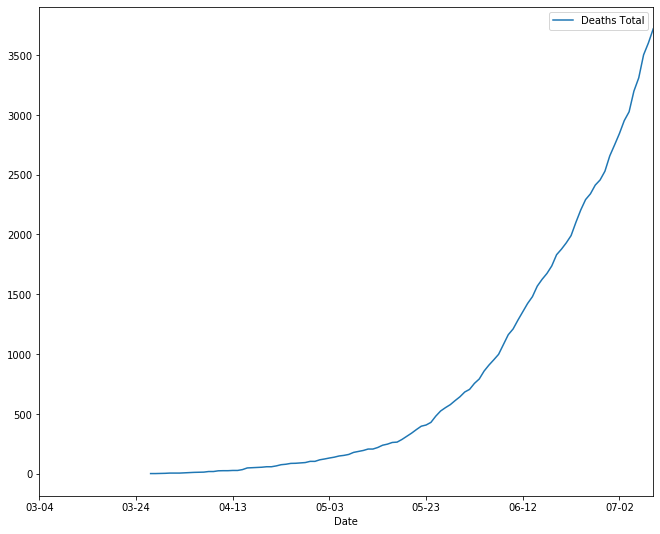

In [16]:
df.plot(x="Date", y=["Deaths Total"], figsize = (11, 9))

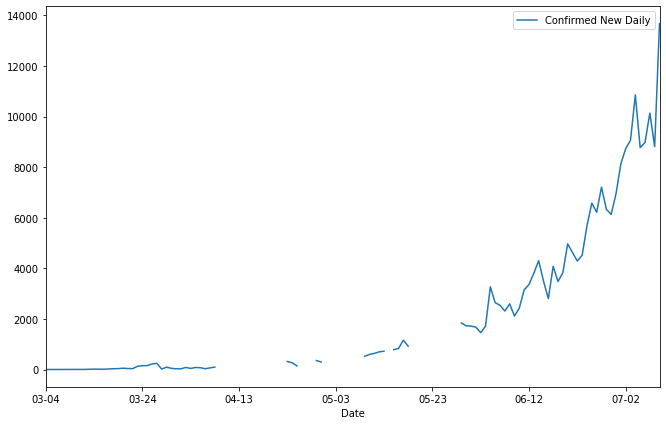

In [19]:
#df["Confirmed New"].fillna(0, inplace=True)
df.plot(x="Date", y=["Confirmed New Daily"], figsize = (11, 7))

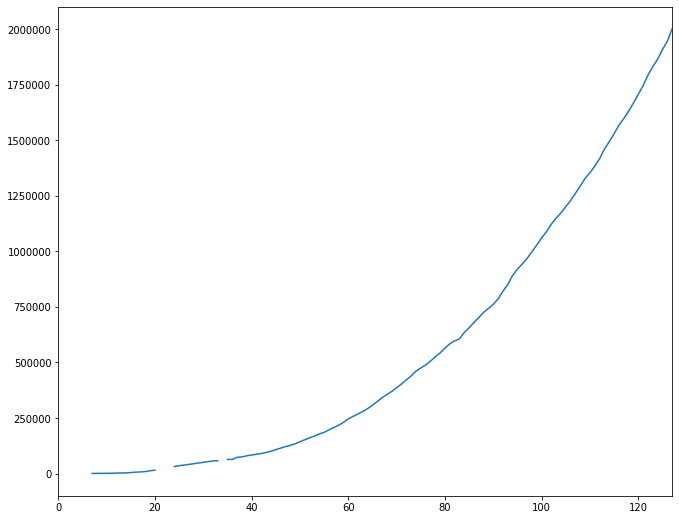

In [20]:
df["People tested(antigen)"].rolling(1).mean().plot(figsize = (11, 9))

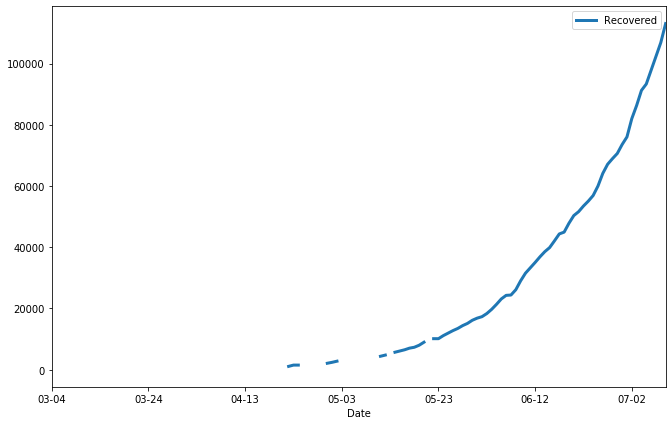

In [21]:
#df["Recovered"].fillna(0, inplace=True)
df.plot(x="Date", y=["Recovered"], figsize = (11, 7), linewidth = 3)

In [23]:
data_plt = pd.DataFrame(np.random.randn(36, 4), index=df.index, columns = ['Confirmed New Daily', 'Confirmed Total', 'Deaths Total', 'ntests'])

ValueError: Shape of passed values is (36, 4), indices imply (128, 4)

In [ ]:
data_plt = data_plt.cumsum()

In [ ]:
plt.figure()

In [ ]:
data_plt.plot()

In [96]:
df

,Date,EC,FS,GP,KZN,LP,MP,NW,NC,WC,Unkown Province,Confirmed New,Confirmed Total,Deaths New,Deaths Total,Recovered,Ag\ntests
0,2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,181.0
1,2020-03-05,0,0,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0
2,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0
3,2020-03-07,0,0,1,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0
4,2020-03-08,0,0,0,1,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0
5,2020-03-09,0,0,0,4,0,0,0,0,0,0,4,7,0.0,0.0,0.0,0.0
6,2020-03-10,?,?,4,1,?,?,?,?,1,?,3,10,0.0,0.0,0.0,0.0
7,2020-03-11,0,0,4,1,0,0,0,0,1,0,3,13,0.0,0.0,0.0,645.0
8,2020-03-12,0,0,1,1,0,1,0,0,0,0,3,16,0.0,0.0,0.0,848.0
9,2020-03-13,0,0,4,2,0,0,0,0,2,0,8,24,0.0,0.0,0.0,924.0
